# Imports

In [1]:
import mizani.transforms as tr
from plotnine import *
import pandas as pd
import os

# Utilities

In [15]:
# Load a benchmark result with computed median runtime and number of move and update
def load_benchmark(file_name):
    file_path = '../../../build/reports/' + file_name if os.path.isfile('../../../build/reports/' + file_name) else None
    if not file_path:
        file_path = 'benchmark/build/reports/' + file_name if os.path.isfile('benchmark/build/reports/' + file_name) else None
    if not file_path:
        return None
    
    data =  pd.read_csv(file_path, decimal=",", sep=";")
    runtimes = [x for x in data.columns.to_list() if x.startswith('t')]
    data["mt"] = data[runtimes].median(axis=1)
    return data

In [20]:
# pandas and plotnine options
pd.set_option('display.max_colwidth', None)
CB_PALETTE = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

In [21]:
def runtime_plot(data):
    return ggplot(data, aes(x='factor(algorithm)', y='mt / 1_000_000_000', fill='factor(algorithm)')) + geom_violin(draw_quantiles=[0.25, 0.5, 0.75], show_legend=False) + scale_y_continuous(trans=tr.log_trans(base=10), breaks = [0.0001, 0.001, 0.01, 0.1, 0.5, 10, 100, 1000]) + ylab("Runtime (s)") + xlab("") + scale_fill_manual(values=CB_PALETTE) + theme_light() + theme(text=element_text(size=11), axis_text_x=element_text(rotation=20))

In [22]:
def size_plot(data):
    return ggplot(data, aes(x='factor(algorithm)', y='s', fill='factor(algorithm)')) + geom_violin(draw_quantiles=[0.25, 0.5, 0.75], show_legend=False) + scale_y_continuous(trans=tr.pseudo_log_trans(), breaks = [1, 5, 10, 20, 50, 100, 200, 500, 1000]) + ylab("Edit-script size") + xlab("") + scale_fill_manual(values=CB_PALETTE) + theme_light() + theme(text=element_text(size=11), axis_text_x=element_text(rotation=20))

In [23]:
def all_plots(data):
    return [runtime_plot(data), size_plot(data)]

# GhJava

In [28]:
gh_java = load_benchmark('gh-java.csv')

In [29]:
if gh_java is not None:
    display(gh_java.head())

,case,algorithm,t,t.1,t.2,t.3,t.4,s,ni,nd,nu,nm,mt
0,before/ok-http/3ff6ca140db7d7a06cc2a97902d1546c1bdb80e1/OkHttpConnection.java,simple,6871710,7191844,7752979,7953700,51626181,57,108,19,0,20,7752979.0
1,before/ok-http/3ff6ca140db7d7a06cc2a97902d1546c1bdb80e1/OkHttpConnection.java,auto,190572762,210246217,210288957,211767762,385366918,4,128,39,0,0,210288957.0
2,before/zaproxy/419dacda0e65186d468732da889402226c65f856/PortScanPanel.java,simple,7692712,10320792,10369507,13345218,15984851,262,65,2516,9,50,10369507.0
3,before/zaproxy/419dacda0e65186d468732da889402226c65f856/PortScanPanel.java,auto,150824270,151238000,151974202,158938670,177576851,79,112,2563,9,10,151974202.0
4,before/jabref/590131d55cc5bc2b2648e484c708a042b974e43b/JabRefFrame.java,simple,3490361,4101739,4362553,4491538,13362659,3,20,0,1,0,4362553.0


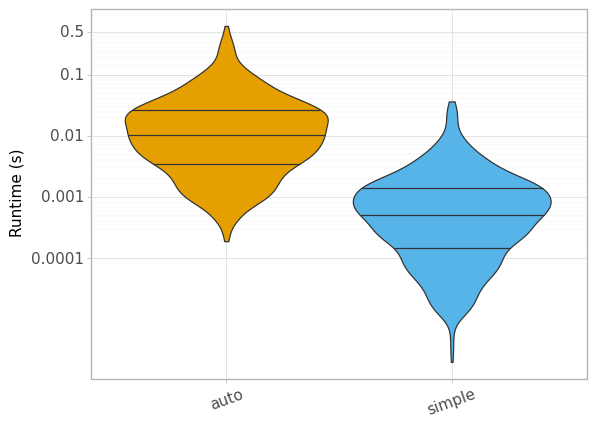

<ggplot: (328741805)>

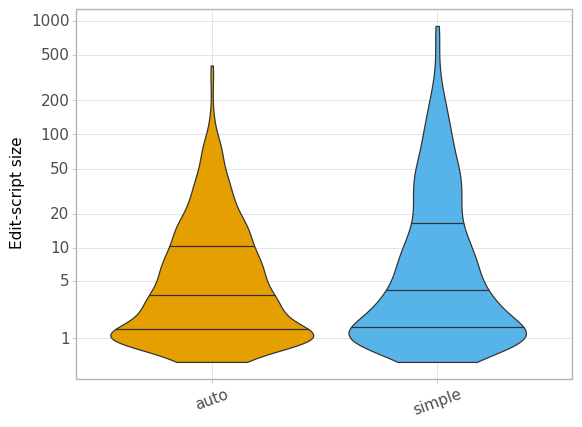

<ggplot: (328035125)>

In [40]:
if gh_java is not None:
    plots = all_plots(gh_java)
    for plot in plots:
        display(plot)



In [31]:
if gh_java is not None:
    overtime = gh_java[gh_java["mt"] > 1_000_000_000]
    display(overtime)

,case,algorithm,t,t.1,t.2,t.3,t.4,s,ni,nd,nu,nm,mt


# GhPython

In [32]:
gh_python = load_benchmark('gh-python.csv')


In [34]:
if gh_python is not None:
    display(gh_python.head())

,case,algorithm,t,t.1,t.2,t.3,t.4,s,ni,nd,nu,nm,mt
0,before/keras/e16891e5e1044cabbf058409c0b75d26428afd81/embeddings.py,simple,3984631,4232976,5099048,6078325,98713798,2,0,14,0,0,5099048.0
1,before/keras/e16891e5e1044cabbf058409c0b75d26428afd81/embeddings.py,auto,84075623,88721232,89470634,112448629,136374414,2,0,14,0,0,89470634.0
2,before/wagtail/eb354a1147fa9ee482a9f1ddbf40d97262486371/home.py,simple,610288,711508,832286,864438,2615902,1,0,0,1,0,832286.0
3,before/wagtail/eb354a1147fa9ee482a9f1ddbf40d97262486371/home.py,auto,33555079,36124553,39903121,40373598,48485198,1,0,0,1,0,39903121.0
4,before/django/272b2175578c0ede4359fb10c96831b4aea95933/meta.py,simple,18482677,19014405,20497456,25381467,85775684,3,10,4,1,0,20497456.0


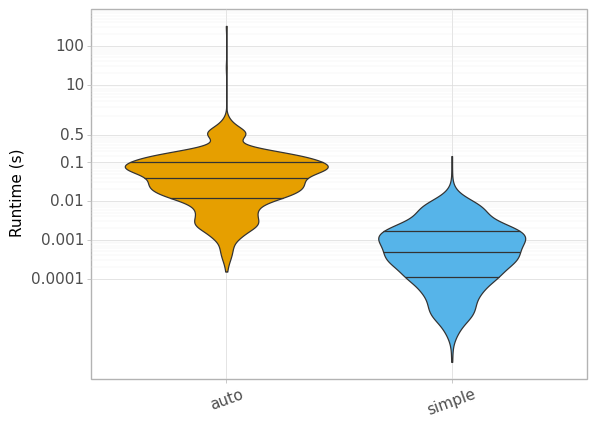

<ggplot: (327287577)>

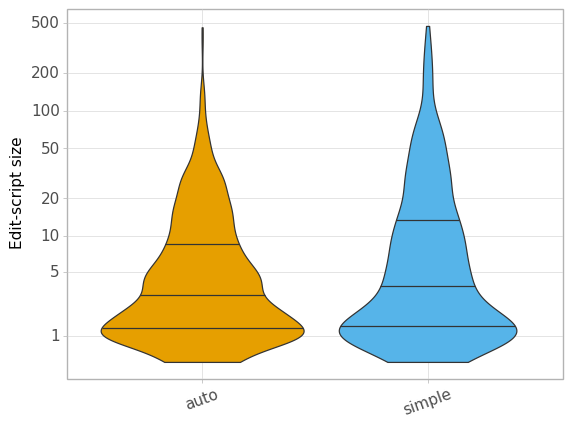

<ggplot: (328960905)>

In [44]:
if gh_python is not None:
    plots = all_plots(gh_python)
    for plot in plots:
        display(plot)

In [36]:
if gh_python is not None:
    overtime = gh_python[gh_python["mt"] > 1_000_000_000]
    display(overtime)

,case,algorithm,t,t.1,t.2,t.3,t.4,s,ni,nd,nu,nm,mt
5,before/django/272b2175578c0ede4359fb10c96831b4aea95933/meta.py,auto,1244637602,1262307032,1340971076,1414831799,2856471832,3,10,4,1,0,1.340971e+09
515,before/django/2e4322123f61160470ef7c879470a364f5f968e7/meta.py,auto,1017748208,1027274856,1033076416,1054995877,1055070719,7,12,13,3,0,1.033076e+09
1087,before/django/8acc6048e8fe17e1ba7e9df30aace2ef84d68276/meta.py,auto,1144802077,1184187441,1233089849,1243949874,1395034240,6,4,23,0,0,1.233090e+09
1209,before/django/dc2933f73b4a970d6b37241b6f185bbbacd1bb69/meta.py,auto,865457039,964010170,1003099159,1016250184,2449450106,1,176,0,0,0,1.003099e+09
1335,before/scikit-learn/cd076afe9dc8868c63f52e0ca47b7051f81d3d9f/german.py,auto,24936142749,26148365736,27668081776,30849496326,33028449557,1,0,0,1,0,2.766808e+10
1363,before/scikit-learn/cd076afe9dc8868c63f52e0ca47b7051f81d3d9f/pendigits.py,auto,262032500411,315926047016,324531908431,347930588094,431899933268,0,0,0,0,0,3.245319e+11
1517,before/django/b1c543d0910a79f4de93464fa684416c9441f7ce/meta.py,auto,967875102,990481831,1026126877,1045943872,1048538249,10,54,31,0,0,1.026127e+09


# Defects4J

In [42]:
d4j = load_benchmark('defects4j.csv')

In [43]:
if d4j is not None:
    display(d4j.head())

In [46]:
if d4j is not None:
    plots = all_plots(d4j)
    for plot in plots:
        display(plot)

In [45]:
if d4j is not None:
    overtime = d4j[d4j["mt"] > 1_000_000_000]
    display(overtime)

# BugsInPy

In [ ]:
bip = load_benchmark('bugsinpy.csv')

In [ ]:
if bip is not None:
    display(bip.head())

In [ ]:
if bip is not None:
    plots = all_plots(bip)
    for plot in plots:
        display(plot)

In [ ]:
if bip is not None:
    overtime = bip[bip["mt"] > 1_000_000_000]
    display(overtime)